In [1]:
import numpy as np
import pandas as pd

import os

In [2]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

df=pd.read_csv('https://raw.githubusercontent.com/TrainingByPackt/Data-Science-with-Python/master/Chapter01/Data/Wholesale%20customers%20data.csv')
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


,0,1,2,3,4,5,6,7
0,1.448652,0.590668,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339
1,1.448652,0.590668,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151
2,1.448652,0.590668,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293
3,-0.690297,0.590668,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411
4,1.448652,0.590668,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347


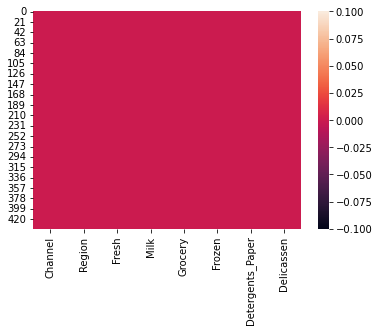

In [3]:
import seaborn as sns
sns.heatmap(df.isnull())

from sklearn.preprocessing import StandardScaler
SC=StandardScaler()
df_new=SC.fit_transform(df)
df_1=pd.DataFrame(df_new)
df_1.head()

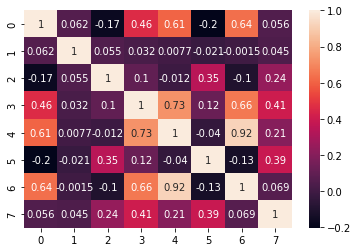

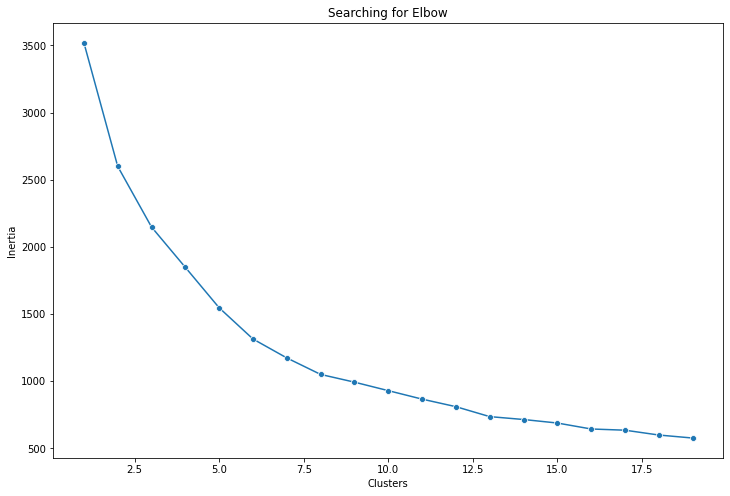

1173.7285957651095 [[ 1.44865163e+00  1.63142372e-01 -3.47307951e-01  4.28317250e-01
   6.66702394e-01 -3.55967591e-01  6.92257331e-01  5.10760509e-03]
 [-5.85958124e-01  3.06837875e-01  2.20613537e+00 -1.19291097e-01
  -2.32891763e-01  7.20743321e-01 -4.15801071e-01  3.80233936e-01]
 [-6.90297086e-01  5.90668285e-01 -2.52033049e-01 -3.85809244e-01
  -4.76606883e-01 -8.06492077e-02 -4.42468053e-01 -1.83933396e-01]
 [ 1.44865163e+00  2.93864819e-03  3.88728973e-01  3.94304862e+00
   4.02164626e+00  3.57841274e-02  4.22611641e+00  9.41635735e-01]
 [-6.90297086e-01 -5.58343155e-02  7.92784210e-01  5.61685048e-01
  -1.13014360e-02  9.25255676e+00 -4.64047057e-01  9.33164138e-01]
 [-5.65939603e-01 -1.58939862e+00 -1.29162616e-01 -3.53211563e-01
  -4.09523871e-01  3.37648564e-02 -4.22842794e-01 -1.48108824e-01]
 [-6.90297086e-01  5.90668285e-01  1.96681731e+00  5.17550306e+00
   1.28721685e+00  6.90059988e+00 -5.54861977e-01  1.64784475e+01]]


In [7]:
sns.heatmap(df_1[df_1.corr().index].corr(),annot=True)

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
clusters=[]
for i in range(1,20):
    model = KMeans(n_clusters=i,
               init='k-means++')

    model.fit(df_1)
    clusters.append(model.inertia_)
    
fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x=list(range(1, 20)), y=clusters, ax=ax,marker='o')
ax.set_title('Searching for Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')
plt.show()

model = KMeans(n_clusters=7,
               init='k-means++')

model.fit(df_1)

print(model.inertia_,model.cluster_centers_)
